<a href="https://colab.research.google.com/github/m-poppins/practice/blob/master/Binary_classification_of_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка данных

Работа проведена на наборе данных IMDB - 50000 отзывов к фильмам в Internet Movie Database.  
Набор состоит из 25000 обучающих и 25000 контрольных отзывов.  
Датасет готов к использованию: отзывы преобазованы в последовательности целых чисел, каждое из которых определяет позицию слова в словаре.

In [31]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

%matplotlib inline

In [32]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000) #Сохраняем в обучающих данных только 10 000 слов, наиболее часто встречающихся

In [33]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [34]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)


In [35]:
y_test=np.asarray(y_test).astype('float32')
y=np.asarray(y_train).astype('float32')

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4)

In [38]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['acc']
) 

In [39]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=512)

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5248 - acc: 0.7767 - val_loss: 0.4116 - val_acc: 0.8507
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3214 - acc: 0.9011 - val_loss: 0.3211 - val_acc: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2339 - acc: 0.9262 - val_loss: 0.2872 - val_acc: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1856 - acc: 0.9405 - val_loss: 0.2783 - val_acc: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1502 - acc: 0.9529 - val_loss: 0.3253 - val_acc: 0.8668
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1254 - acc: 0.9631 - val_loss: 0.3233 - val_acc: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1067 - acc: 0.9675 - val_loss: 0.3088 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0885 - a

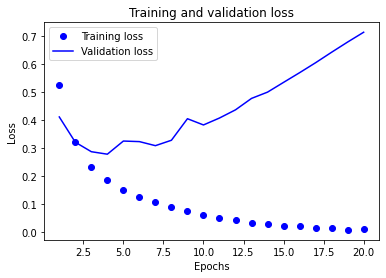

In [42]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


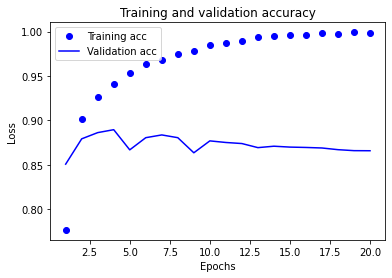

In [44]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['acc']
) 

In [48]:
history=model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val), batch_size=512)

Epoch 1/3
30/30 [==============================] - 1s 40ms/step - loss: 0.5053 - acc: 0.7877 - val_loss: 0.3852 - val_acc: 0.8607
Epoch 2/3
30/30 [==============================] - 1s 35ms/step - loss: 0.2970 - acc: 0.9067 - val_loss: 0.3674 - val_acc: 0.8448
Epoch 3/3
30/30 [==============================] - 1s 39ms/step - loss: 0.2182 - acc: 0.9285 - val_loss: 0.2858 - val_acc: 0.8904


In [49]:
model.predict(X_test)

array([[0.36732256],
       [0.99863327],
       [0.8967321 ],
       ...,
       [0.19360852],
       [0.20596483],
       [0.65480477]], dtype=float32)